<a href="https://colab.research.google.com/github/john-s-butler-dit/Numerical-Analysis-Python/blob/master/Chapter%2002%20-%20Higher%20Order%20Methods/2_Problem%20Sheet/02_PS%20Question%201a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Sheet 2 Question 1a - 2nd Order Taylor

The general form of the population growth differential equation
\begin{equation} y^{'}=t-y, \ \ (0 \leq t \leq 4), \end{equation}
with the initial condition
\begin{equation}y(0)=1\end{equation}
For N=4
with the analytic (exact) solution
\begin{equation} y= 2e^{-t}+t+1.\end{equation}


Apply __2nd Order Taylor Method__ to approximate the solution of the given initial value problems using the indicated number of time steps. Compare the approximate solution with the given exact solution, and compare the actual error with the theoretical error.



In [1]:
## Library
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings
import pandas as pd

warnings.filterwarnings("ignore")

## General Discrete Interval
The continuous time $a\leq t \leq b $ is discretised into $N$ points seperated by a constant stepsize
\begin{equation} h=\frac{b-a}{N}.\end{equation}
## Specific Discrete Interval
Here the interval is $0\leq t \leq 4$ with $N=4$ 
\begin{equation} h=\frac{4-0}{4}=1.\end{equation}
This gives the 5 discrete points with stepsize h=1:
\begin{equation} t_0=0, \ t_1=1, \ ... t_{4}=4. \end{equation}
This is generalised to 
\begin{equation} t_i=0+i1, \ \ \ i=0,1,...,4.\end{equation}
The plot below illustrates the discrete time steps from 0 to 4.

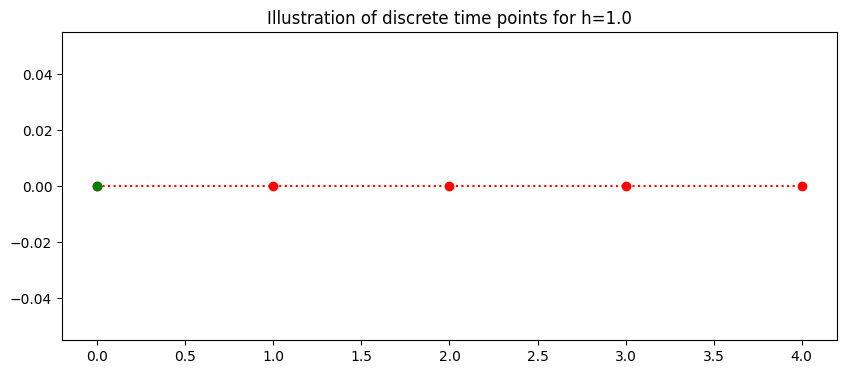

In [2]:
### Setting up time
t_end=4
t_start=0
N=4
h=(t_end-t_start)/(N)
t=np.arange(t_start,t_end+0.01,h)
fig = plt.figure(figsize=(10,4))
plt.plot(t,0*t,'o:',color='red')
plt.plot(t[0],0*t[0],'o',color='green')


plt.title('Illustration of discrete time points for h=%s'%(h))
plt.plot();

## 2nd Order Taylor Solution

The 2nd Order Taylor difference equation is given by
\begin{equation} w_{i+1}=w_i+h\left[f(t_i,w_i)+\frac{h}{2}f'(t_i,w_i)\right],\end{equation}
where
\begin{equation} f(t_i,w_i)=t_i-w_i\end{equation}
and
\begin{equation} f'(t_i,w_i)=1-t_i+w_i,\end{equation}
which gives
\begin{equation} w_{i+1}=w_i+h(t_i-w_i)+\frac{h^2}{2}(1-t_i+w_i) \end{equation}
for $i=0,1,2,3$ with the initial condition,
\begin{equation}w_0=1.\end{equation}

In [3]:
IC=1

INTITIAL_CONDITION=IC
w=np.zeros(N+1)
w[0]=INTITIAL_CONDITION
for i in range (0,N):
    w[i+1]=w[i]+h*(t[i]-w[i])+h*h/2*(1-t[i]+w[i])

In [4]:
y=2*np.exp(-t)+t-1 # Exact Solution

## Global Error
The upper bound of the global error is:
\begin{equation} |y(t_i)-w_i|\leq\frac{Mh^2}{6}\frac{1}{L} |e^{Lt_i}-1|, \end{equation}
where
$|y'''(t)|\leq M $ for $t \in (0,4)$ and $L$ is the Lipschitz constant.
Generally we do not have access to $M$ or $L$, but as we have the exact solution we can find $M$ and $L$.
### Local Error
The global error consistent of an exponential term and the local error.
The local error for the 2nd Order Taylor method is
\begin{equation} |y(t_1)-w_1|<\tau=\frac{Mh^2}{6}, \end{equation}
by differentiation the exact solution 
$ y= 2e^{-t}+t+1$
three times
\begin{equation}y'=-2e^{-t}+1,\end{equation}
\begin{equation}y''=2e^{-t},\end{equation}
and
\begin{equation}y'''=-2e^{-t}.\end{equation}
Then we choose the largest possible value of $y''$ on the interval of interest $(0,4)$, which gives,

\begin{equation}|y''(t)|\leq |-2e^{0}|=2, \end{equation}
therefore
\begin{equation}M=2.\end{equation}
This gives the local error
\begin{equation} |y(t_1)-w_1|<\tau=\frac{Mh^2}{6}=\frac{2h^2}{6}=\frac{h^2}{3}.\end{equation}
### Lipschitz constant
The Lipschitz constant $L$ is from the Lipschitz condition,
\begin{equation}\left| \frac{\partial f(t,y)}{\partial t}\right|\leq L. \end{equation}
The constant can be found by taking partical derivative of $f(t,y)=t-y$ with respect to $y$
\begin{equation}\frac{\partial f(t,y)}{\partial y}=-1\end{equation}
\begin{equation}L=|-1|=1.\end{equation}

### Specific Global Upper Bound Formula
Puting these values into the upper bound gives:
\begin{equation} |y(t_i)-w_i|\leq\frac{h^2}{3} |e^{t_i}-1|. \end{equation}

In [5]:
Upper_bound=h*h/(3*1)*(np.exp(t)-1) # Upper Bound

## Results

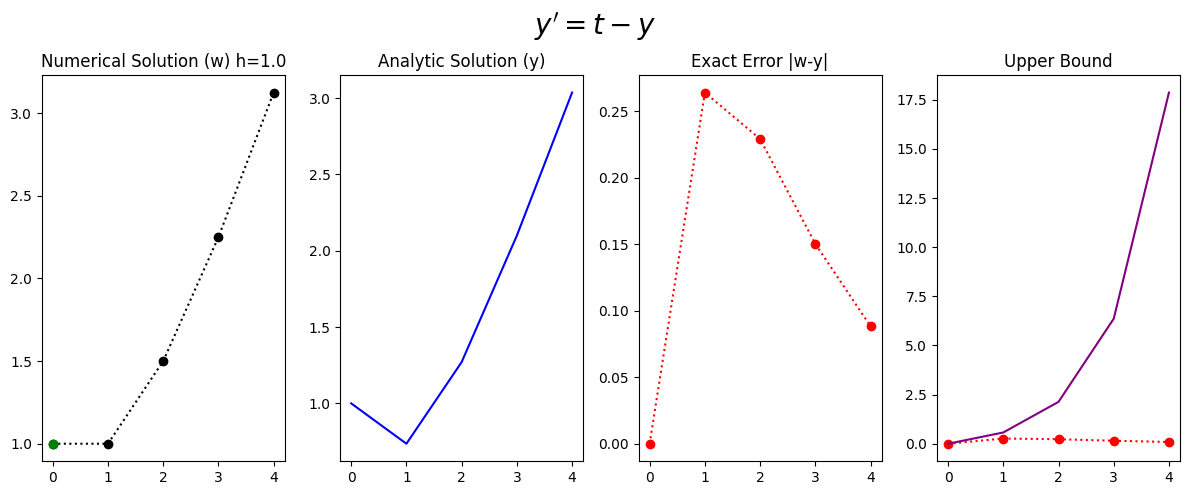

In [6]:
fig = plt.figure(figsize=(12,5))
# --- left hand plot
ax = fig.add_subplot(1,4,1)
plt.plot(t,w,'o:',color='k')
plt.plot(t[0],w[0],'o',color='green')

#ax.legend(loc='best')
plt.title('Numerical Solution (w) h=%s'%(h))

# --- right hand plot
ax = fig.add_subplot(1,4,2)
plt.plot(t,y,color='blue')
plt.title('Analytic Solution (y)')

#ax.legend(loc='best')
ax = fig.add_subplot(1,4,3)
plt.plot(t,np.abs(w-y),'o:',color='red')
plt.title('Exact Error |w-y|')

# --- title, explanatory text and save


ax = fig.add_subplot(1,4,4)
plt.plot(t,np.abs(w-y),'o:',color='red')
plt.plot(t,Upper_bound,color='purple')
plt.title('Upper Bound')

# --- title, explanatory text and save
fig.suptitle(r"$y'=t-y$", fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.85)    

In [7]:

d = {'time t_i': t,    ' 2nd Order Taylor (w_i) ':w,    'Exact (y_i) ':y,    'Exact Error( |y_i-w_i|) ':np.abs(y-w),'Upper Bound':Upper_bound}
df = pd.DataFrame(data=d)
df

,time t_i,2nd Order Taylor (w_i),Exact (y_i),Exact Error( |y_i-w_i|),Upper Bound
0,0.0,1.000,1.000000,0.000000,0.000000
1,1.0,1.000,0.735759,0.264241,0.572761
2,2.0,1.500,1.270671,0.229329,2.129685
3,3.0,2.250,2.099574,0.150426,6.361846
4,4.0,3.125,3.036631,0.088369,17.866050
